In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Set : https://www.kaggle.com/datasets/massinissatinouche/electric-vehicle-population-2023

In [ ]:
veri = pd.read_csv("/content/drive/MyDrive/data/evp.csv")

In [ ]:
veri

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


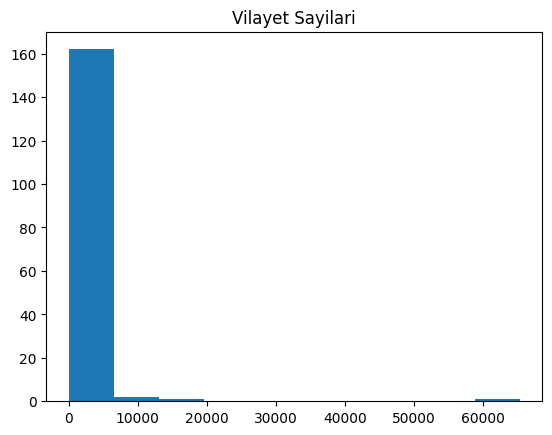

In [ ]:
plt.hist(veri["County"].value_counts())
plt.title("Vilayet Sayilari")
plt.show()

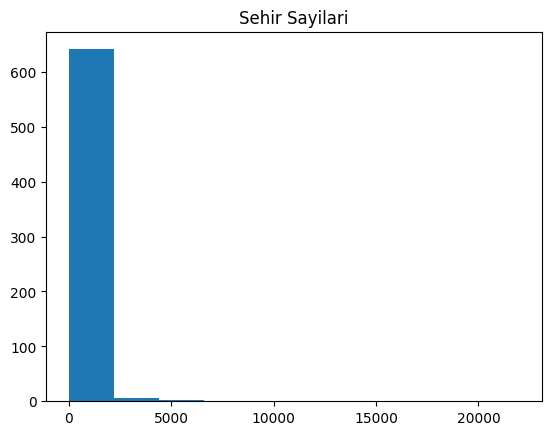

In [ ]:
plt.hist(veri["City"].value_counts())
plt.title("Sehir Sayilari")
plt.show()

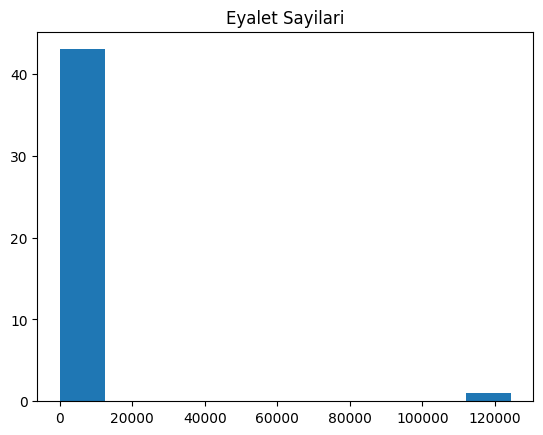

In [ ]:
plt.hist(veri["State"].value_counts())
plt.title("Eyalet Sayilari")
plt.show()

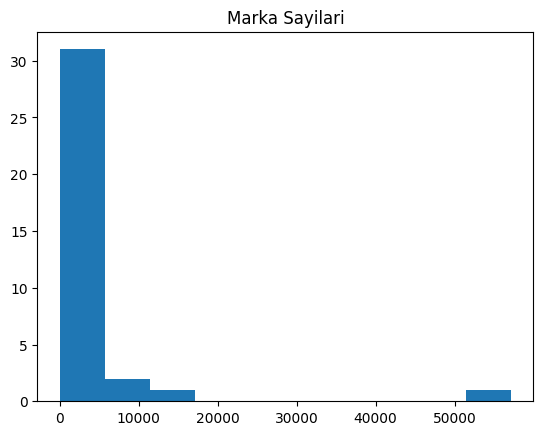

In [ ]:
plt.hist(veri["Make"].value_counts())
plt.title("Marka Sayilari")
plt.show()

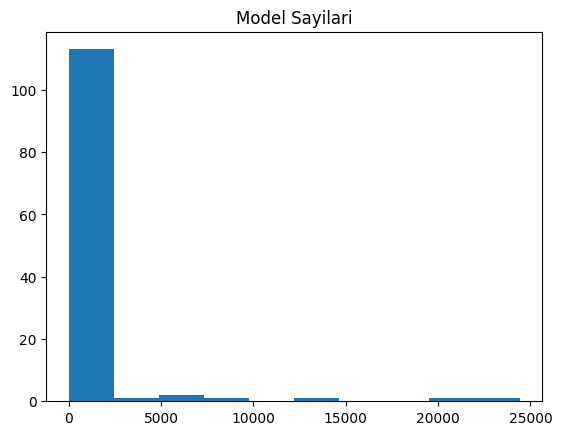

In [ ]:
plt.hist(veri["Model"].value_counts())
plt.title("Model Sayilari")
plt.show()

In [ ]:
veri.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
veri.drop(columns=["Electric Vehicle Type","Clean Alternative Fuel Vehicle (CAFV) Eligibility", "Electric Range", "Base MSRP", 
                   "Legislative District", "DOL Vehicle ID", "Vehicle Location", "Electric Utility", "2020 Census Tract", "Postal Code",
                   "VIN (1-10)"
                  ], inplace=True)

In [ ]:
veri.head()

,County,City,State,Model Year,Make,Model
0,Yakima,Yakima,WA,2020,TESLA,MODEL 3
1,San Diego,San Diego,CA,2019,TESLA,MODEL 3
2,Lane,Eugene,OR,2021,VOLVO,S60
3,Yakima,Yakima,WA,2019,TESLA,MODEL X
4,Snohomish,Bothell,WA,2017,BMW,X5


In [ ]:
print("Farkli Vilayet sayilari = ",veri.County.nunique())
print("Farkli Sehir sayilari = ",veri.City.nunique())
print("Farkli Eyalet sayilari = ",veri.State.nunique())

Farkli Vilayet sayilari =  166
Farkli Sehir sayilari =  651
Farkli Eyalet sayilari =  44


In [ ]:
print(veri.isnull().sum())

County          2
City            2
State           0
Model Year      0
Make            0
Model         181
dtype: int64


In [ ]:
print(veri.isna().sum())

County          2
City            2
State           0
Model Year      0
Make            0
Model         181
dtype: int64


In [ ]:
print(veri.isnull().sum().sum())
print(veri.isna().sum().sum())

185
185


In [ ]:
veri.dropna(inplace=True)

In [ ]:
print(veri.isnull().sum().sum())
print(veri.isna().sum().sum())

0
0


In [ ]:
lveri = veri.apply(preprocessing.LabelEncoder().fit_transform)
print(lveri.head())

   County  City  State  Model Year  Make  Model
0     165   647     40          17    29     68
1     129   498      4          16    29     68
2      78   172     32          18    33     97
3     165   647     40          16    29     70
4     142    54     40          14     3    116


<Axes: >

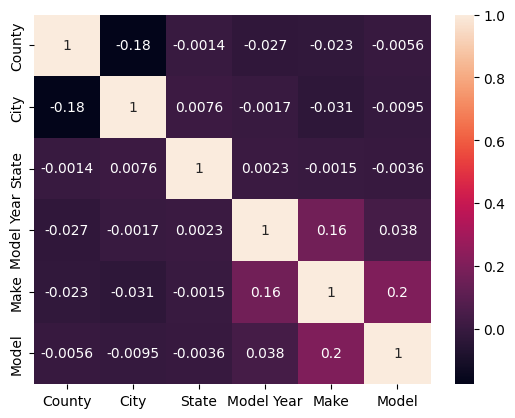

In [ ]:
sns.heatmap(lveri.corr(), annot=True)

In [ ]:
vilayet = veri.iloc[:,0:1]
le = preprocessing.LabelEncoder()
vilayet.iloc[:,0] = le.fit_transform(vilayet.iloc[:,0:1])
print(vilayet)

        County
0          165
1          129
2           78
3          165
4          142
...        ...
124711     142
124712     112
124713     162
124714     112
124715      11

[124533 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-6-d7f4c4fb3b7a>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vilayet.iloc[:,0] = le.fit_transform(vilayet.iloc[:,0:1])


In [ ]:
eyalet = veri.iloc[:,2:3]
le = preprocessing.LabelEncoder()
eyalet.iloc[:,0] = le.fit_transform(eyalet.iloc[:,0:1])
print(eyalet)

        State
0          40
1           4
2          32
3          40
4          40
...       ...
124711     40
124712     40
124713     40
124714     40
124715     40

[124533 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-7-234832dcb883>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  eyalet.iloc[:,0] = le.fit_transform(eyalet.iloc[:,0:1])


In [ ]:
model_yil = veri.iloc[:,3:4]
print(model_yil)

        Model Year
0             2020
1             2019
2             2021
3             2019
4             2017
...            ...
124711        2022
124712        2020
124713        2023
124714        2018
124715        2015

[124533 rows x 1 columns]


In [ ]:
marka = veri.iloc[:,4:5]
le = preprocessing.LabelEncoder()
marka.iloc[:,0] = le.fit_transform(marka.iloc[:,0:1])
print(marka)

        Make
0         29
1         29
2         33
3         29
4          3
...      ...
124711    29
124712    15
124713    29
124714     5
124715     5

[124533 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-9-0f711468757a>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  marka.iloc[:,0] = le.fit_transform(marka.iloc[:,0:1])


In [ ]:
model = veri.iloc[:,5:]
le = preprocessing.LabelEncoder()
model.iloc[:,0] = le.fit_transform(model.iloc[:,0:1])
print(model)

        Model
0          68
1          68
2          97
3          70
4         116
...       ...
124711     68
124712     73
124713     71
124714     16
124715    112

[124533 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-10-be362488b911>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  model.iloc[:,0] = le.fit_transform(model.iloc[:,0:1])


In [ ]:
ohe = preprocessing.OneHotEncoder()
sehir = veri.iloc[:,1:2].values
sehir = ohe.fit_transform(sehir).toarray()
sehir

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
bagimli = enumerate(veri.iloc[:,1:2].values)
sonuc = np.zeros((len(veri.iloc[:,1:2].values), veri.City.nunique()))
sehirler = list(veri.City.unique())
val = list()
for i,j in bagimli:
    val.append((i,j[0]))

for i,j in val:
  sonuc[i,sehirler.index(j)] = 1.0


In [ ]:
dfCity = pd.DataFrame(data=sonuc, columns = veri.City.unique())
dfCity

,Yakima,San Diego,Eugene,Bothell,Everett,Poulsbo,Naches,Port Orchard,Olalla,Olympia,...,Altus,Andrews Air Force Base,Salem,Warner Robins,Lincoln City,Uniontown,Bumpass,Silver Spring,Cheyenne,Twentynine Palms
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
yveri = veri.copy()
yveri = np.concatenate((veri,vilayet), axis=1)
yveri = np.concatenate((yveri,eyalet), axis=1)
yveri = np.concatenate((yveri,model_yil), axis=1)
yveri = np.concatenate((yveri,marka), axis=1)
yveri = np.concatenate((yveri,model), axis=1)
yveri = np.concatenate((yveri,sonuc), axis=1)

In [ ]:
yveri = pd.DataFrame(yveri)

In [ ]:
print(yveri.isnull().sum().sum())
print(yveri.isna().sum().sum())

0
0


In [ ]:
veri.head()

,County,City,State,Model Year,Make,Model
0,Yakima,Yakima,WA,2020,TESLA,MODEL 3
1,San Diego,San Diego,CA,2019,TESLA,MODEL 3
2,Lane,Eugene,OR,2021,VOLVO,S60
3,Yakima,Yakima,WA,2019,TESLA,MODEL X
4,Snohomish,Bothell,WA,2017,BMW,X5


In [ ]:
yveri.head()

,0,1,2,3,4,5,6,7,8,9,...,652,653,654,655,656,657,658,659,660,661
0,Yakima,Yakima,WA,2020,TESLA,MODEL 3,165,40,2020,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,San Diego,San Diego,CA,2019,TESLA,MODEL 3,129,4,2019,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Lane,Eugene,OR,2021,VOLVO,S60,78,32,2021,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Yakima,Yakima,WA,2019,TESLA,MODEL X,165,40,2019,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Snohomish,Bothell,WA,2017,BMW,X5,142,40,2017,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
yveri.drop([0,1,2,3,4,5], axis =1, inplace=True)

In [ ]:
yveri.rename(columns={6:"County", 7:"State", 8:"Model_Year", 9: "Make", 10:"Model"}, inplace=True)

In [ ]:
i = 11
for j in sehirler:
  yveri.rename(columns={i:j}, inplace=True)
  i += 1


In [ ]:
veri.head()

,County,City,State,Model Year,Make,Model
0,Yakima,Yakima,WA,2020,TESLA,MODEL 3
1,San Diego,San Diego,CA,2019,TESLA,MODEL 3
2,Lane,Eugene,OR,2021,VOLVO,S60
3,Yakima,Yakima,WA,2019,TESLA,MODEL X
4,Snohomish,Bothell,WA,2017,BMW,X5


In [ ]:
yveri.head()

,County,State,Model_Year,Make,Model,Yakima,San Diego,Eugene,Bothell,Everett,...,Altus,Andrews Air Force Base,Salem,Warner Robins,Lincoln City,Uniontown,Bumpass,Silver Spring,Cheyenne,Twentynine Palms
0,165,40,2020,29,68,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,129,4,2019,29,68,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78,32,2021,33,97,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,165,40,2019,29,70,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142,40,2017,3,116,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in yveri.columns:
  yveri[i] = yveri[i].astype(int)

In [ ]:
print(yveri.isnull().sum().sum())
print(yveri.isna().sum().sum())

0
0


In [ ]:
yveri.to_csv("data.csv")

In [ ]:
yveri = pd.read_csv("/content/drive/MyDrive/data/data.csv")

yveri.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
yveri.info(verbose=True, show_counts=True)

In [ ]:
yveri.head()

,County,State,Model_Year,Make,Model,Yakima,San Diego,Eugene,Bothell,Everett,...,Altus,Andrews Air Force Base,Salem,Warner Robins,Lincoln City,Uniontown,Bumpass,Silver Spring,Cheyenne,Twentynine Palms
0,165,40,2020,29,68,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,129,4,2019,29,68,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,78,32,2021,33,97,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,165,40,2019,29,70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,142,40,2017,3,116,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
yveri.describe()

,County,State,Model_Year,Make,Model,Yakima,San Diego,Eugene,Bothell,Everett,...,Altus,Andrews Air Force Base,Salem,Warner Robins,Lincoln City,Uniontown,Bumpass,Silver Spring,Cheyenne,Twentynine Palms
count,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000,...,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000,124533.000000
mean,87.296259,39.947821,2019.401211,21.720998,66.927128,0.003654,0.000096,0.000008,0.030899,0.013378,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000016,0.000008,0.000008
std,37.694691,1.260841,2.975027,10.110762,23.607037,0.060335,0.009816,0.002834,0.173046,0.114887,...,0.002834,0.002834,0.002834,0.002834,0.002834,0.002834,0.002834,0.004007,0.002834,0.002834
min,0.000000,0.000000,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,40.000000,2018.000000,12.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.000000,40.000000,2020.000000,29.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112.000000,40.000000,2022.000000,29.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,165.000000,42.000000,2023.000000,34.000000,119.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = yveri.iloc[:,:5]
X

,County,State,Model_Year,Make,Model
0,165,40,2020,29,68
1,129,4,2019,29,68
2,78,32,2021,33,97
3,165,40,2019,29,70
4,142,40,2017,3,116
...,...,...,...,...,...
124528,142,40,2022,29,68
124529,112,40,2020,15,73
124530,162,40,2023,29,71
124531,112,40,2018,5,16


In [ ]:
y = yveri.iloc[:,5:]
y

,Yakima,San Diego,Eugene,Bothell,Everett,Poulsbo,Naches,Port Orchard,Olalla,Olympia,...,Altus,Andrews Air Force Base,Salem,Warner Robins,Lincoln City,Uniontown,Bumpass,Silver Spring,Cheyenne,Twentynine Palms
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
clf = Sequential()
clf.add(Dense(units= 64, activation= "relu", input_dim= 5))
clf.add(Dropout(0.5))
clf.add(Dense(units= 64, activation= "relu"))
clf.add(Dropout(0.5))
clf.add(Dense(units= 651, activation= "sigmoid"))

In [ ]:
clf.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics= ["mae"])

In [ ]:
clf.fit(X_train, y_train, epochs=1000,batch_size=512, validation_split=0.1)

Epoch 1/1000
154/154 [==============================] - 2s 12ms/step - loss: 2.7504 - mae: 0.0474 - val_loss: 0.0178 - val_mae: 0.0047
Epoch 2/1000
154/154 [==============================] - 2s 11ms/step - loss: 0.0206 - mae: 0.0049 - val_loss: 0.0107 - val_mae: 0.0056
Epoch 3/1000
154/154 [==============================] - 2s 11ms/step - loss: 0.0129 - mae: 0.0043 - val_loss: 0.0090 - val_mae: 0.0041
Epoch 4/1000
154/154 [==============================] - 2s 11ms/step - loss: 0.0105 - mae: 0.0039 - val_loss: 0.0081 - val_mae: 0.0035
Epoch 5/1000
154/154 [==============================] - 2s 16ms/step - loss: 0.0096 - mae: 0.0037 - val_loss: 0.0078 - val_mae: 0.0035
Epoch 6/1000
154/154 [==============================] - 2s 12ms/step - loss: 0.0092 - mae: 0.0036 - val_loss: 0.0076 - val_mae: 0.0037
Epoch 7/1000
154/154 [==============================] - 2s 11ms/step - loss: 0.0089 - mae: 0.0035 - val_loss: 0.0075 - val_mae: 0.0034
Epoch 8/1000
154/154 [==============================] -

Tahmin

In [ ]:
y_pred = clf.predict(X_test)

1168/1168 [==============================] - 1s 979us/step


In [ ]:
print(y_pred)

[[0.00000000e+00 4.61499127e-07 4.11851109e-10 ... 1.64287012e-05
  6.82564205e-05 1.55794062e-08]
 [0.00000000e+00 7.85566385e-07 5.68576297e-10 ... 2.70753189e-05
  1.02752521e-04 2.23167671e-08]
 [0.00000000e+00 6.22268772e-07 4.82569262e-10 ... 2.09301161e-05
  8.25233656e-05 1.92036484e-08]
 ...
 [0.00000000e+00 4.50003967e-07 4.07844813e-10 ... 1.61843254e-05
  6.75787087e-05 1.52952477e-08]
 [0.00000000e+00 5.11297969e-07 4.29172420e-10 ... 1.74923280e-05
  7.12454203e-05 1.67879080e-08]
 [0.00000000e+00 8.69282417e-07 6.22659424e-10 ... 3.13149794e-05
  1.17416756e-04 2.37392701e-08]]


Sonuc

In [ ]:
clf.evaluate(X_test, y_test)

1168/1168 [==============================] - 2s 2ms/step - loss: 0.0065 - mae: 0.0039


[0.006503043230623007, 0.003929862752556801]

In [ ]:
print("Kullaninal Olcumler = ",clf.metrics_names)

Kullaninal Olcumler =  ['loss', 'mae']


In [ ]:
clf.optimizer

In [ ]:
clf.get_layer

<bound method Model.get_layer of <keras.engine.sequential.Sequential object at 0x7f0d47fb57e0>>

In [ ]:
clf.get_compile_config()

{'optimizer': 'rmsprop',
 'loss': 'binary_crossentropy',
 'metrics': ['mae'],
 'loss_weights': None,
 'weighted_metrics': None,
 'run_eagerly': None,
 'steps_per_execution': None,
 'jit_compile': None}

In [ ]:
clf.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 5),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 5),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.5,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
   

In [ ]:
clf.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.006503043>,
 'mae': <tf.Tensor: shape=(), dtype=float32, numpy=0.0039298628>}

In [ ]:
clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 651)               42315     
                                                                 
Total params: 46,859
Trainable params: 46,859
Non-trainable params: 0
_________________________________________________________________


Egitilmis Veri Kullanmak icin

In [ ]:
pickle.dump(clf, open("ev_fitted", "wb"))

In [ ]:
ogrenilmis = pickle.load(open("/content/ev_fitted", "rb"))
ogrenilmis.predict(X_test)

1168/1168 [==============================] - 1s 904us/step


array([[0.00000000e+00, 4.61499127e-07, 4.11851109e-10, ...,
        1.64287012e-05, 6.82564205e-05, 1.55794062e-08],
       [0.00000000e+00, 7.85566385e-07, 5.68576297e-10, ...,
        2.70753189e-05, 1.02752521e-04, 2.23167671e-08],
       [0.00000000e+00, 6.22268772e-07, 4.82569262e-10, ...,
        2.09301161e-05, 8.25233656e-05, 1.92036484e-08],
       ...,
       [0.00000000e+00, 4.50003967e-07, 4.07844813e-10, ...,
        1.61843254e-05, 6.75787087e-05, 1.52952477e-08],
       [0.00000000e+00, 5.11297969e-07, 4.29172420e-10, ...,
        1.74923280e-05, 7.12454203e-05, 1.67879080e-08],
       [0.00000000e+00, 8.69282417e-07, 6.22659424e-10, ...,
        3.13149794e-05, 1.17416756e-04, 2.37392701e-08]], dtype=float32)